In [2]:
import pandas as pd

df = pd.read_csv("banana.csv")
df2 = pd.read_csv("banana.csv")

df.head()
print(df.columns)

Index(['sample_id', 'variety', 'region', 'quality_score', 'quality_category',
       'ripeness_index', 'ripeness_category', 'sugar_content_brix',
       'firmness_kgf', 'length_cm', 'weight_g', 'harvest_date',
       'tree_age_years', 'altitude_m', 'rainfall_mm', 'soil_nitrogen_ppm'],
      dtype='object')


In [3]:
##Cleaning Data
df = df.dropna()
df = df.drop_duplicates()

df.isnull().sum()

sample_id             0
variety               0
region                0
quality_score         0
quality_category      0
ripeness_index        0
ripeness_category     0
sugar_content_brix    0
firmness_kgf          0
length_cm             0
weight_g              0
harvest_date          0
tree_age_years        0
altitude_m            0
rainfall_mm           0
soil_nitrogen_ppm     0
dtype: int64

In [4]:
df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


In [8]:
from sklearn.preprocessing import LabelEncoder

# 1. Encode the 'variety' and 'ripeness_category' columns using Label Encoding
label_encoder = LabelEncoder()

# Encode 'variety' and 'ripeness_category'
df['variety_encoded'] = label_encoder.fit_transform(df['variety'])
df['ripeness_category_encoded'] = label_encoder.fit_transform(df['ripeness_category'])

# 2. Drop the 'region' and 'quality_category' columns
df_cleaned = df.drop(columns=['region', 'quality_category','variety','ripeness_category','harvest_date'])

# Display the cleaned DataFrame
print(df_cleaned)

     sample_id  quality_score  ripeness_index  sugar_content_brix  \
0            1           1.88            2.11               16.83   
1            2           2.42            4.25               16.73   
2            3           3.57            6.24               21.34   
3            4           2.21            5.39               16.75   
4            5           2.35            5.84               16.90   
..         ...            ...             ...                 ...   
995        996           3.50            4.94               21.06   
996        997           2.38            6.74               16.10   
997        998           1.68            1.41               17.17   
998        999           2.02            1.34               17.03   
999       1000           2.69            2.69               21.10   

     firmness_kgf  length_cm  weight_g  tree_age_years  altitude_m  \
0            3.53      21.44    146.92            13.7        58.2   
1            4.09      26.11   

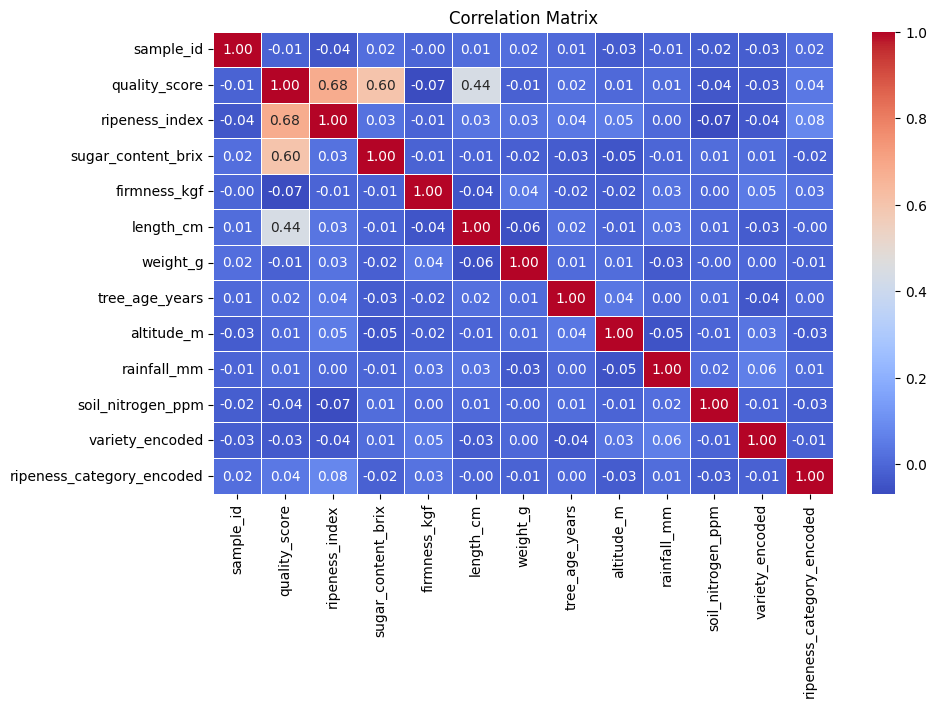

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Analysis
correlation_matrix = df_cleaned.corr()  # Calculate correlation matrix for numerical features

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Kita predict quality score dengan ripeness, sugar content

In [11]:
print(df_cleaned.columns)

Index(['sample_id', 'quality_score', 'ripeness_index', 'sugar_content_brix',
       'firmness_kgf', 'length_cm', 'weight_g', 'tree_age_years', 'altitude_m',
       'rainfall_mm', 'soil_nitrogen_ppm', 'variety_encoded',
       'ripeness_category_encoded'],
      dtype='object')


In [12]:
df_filtered = df[['ripeness_index', 'sugar_content_brix', 'quality_score']]

print(df_filtered)

     ripeness_index  sugar_content_brix  quality_score
0              2.11               16.83           1.88
1              4.25               16.73           2.42
2              6.24               21.34           3.57
3              5.39               16.75           2.21
4              5.84               16.90           2.35
..              ...                 ...            ...
995            4.94               21.06           3.50
996            6.74               16.10           2.38
997            1.41               17.17           1.68
998            1.34               17.03           2.02
999            2.69               21.10           2.69

[1000 rows x 3 columns]
